In [1]:
from pathlib import Path
from collections import namedtuple

import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## いくつかのフィルターの例

In [ ]:
import cv2

## CNNの計算

- 普通

In [62]:
conv2d_0 = torch.nn.Conv2d(1, 1, 3)
conv2d_0.weight.data[0] = 1
conv2d_0.bias.data =  torch.tensor([0.])
x = torch.ones(5,5).float()
conv2d_0(x.view(1, 1, 5, 5)).shape

torch.Size([1, 1, 3, 3])

In [63]:
x.shape

torch.Size([5, 5])

In [65]:
conv2d_0.weight

Parameter containing:
tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]]], requires_grad=True)

In [85]:
conv2d_0 = torch.nn.Conv2d(2, 2, 3)
conv2d_0.weight.data[0] = 1
conv2d_0.weight.data[1] = 2
conv2d_0.bias.data =  torch.tensor([0., 0.])
x = torch.arange(18).float()
conv2d_0(x.view(1, 2, 3, 3)).shape

torch.Size([1, 2, 1, 1])

In [86]:
conv2d_0.weight

Parameter containing:
tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],

         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],


        [[[2., 2., 2.],
          [2., 2., 2.],
          [2., 2., 2.]],

         [[2., 2., 2.],
          [2., 2., 2.],
          [2., 2., 2.]]]], requires_grad=True)

## 計算の詳細
$1 * ( 0 + 1 +  \ldots 17) = 153$,
$2 * ( 0 + 1 +  \ldots 17) = 306$

In [83]:
conv2d_0 = torch.nn.Conv2d(2, 2, 3)
conv2d_0.weight.data[0] = 1
conv2d_0.weight.data[1] = 2
conv2d_0.bias.data =  torch.tensor([0., 0.])
x = torch.arange(18).float()
conv2d_0(x.view(1, 2, 3, 3))

tensor([[[[153.]],

         [[306.]]]], grad_fn=<MkldnnConvolutionBackward>)

$153 + 9 * 13 = 270$

In [80]:
conv2d_0 = torch.nn.Conv2d(2, 2, 3)
conv2d_0.weight.data[0][0] = 1
conv2d_0.weight.data[0][1] = 2
conv2d_0.bias.data =  torch.tensor([0., 0.])
x = torch.arange(18).float()
conv2d_0(x.view(1, 2, 3, 3))

tensor([[[[270.0000]],

         [[ 10.7776]]]], grad_fn=<MkldnnConvolutionBackward>)

In [78]:
x.view(1, 2, 3, 3)

tensor([[[[ 0.,  1.,  2.],
          [ 3.,  4.,  5.],
          [ 6.,  7.,  8.]],

         [[ 9., 10., 11.],
          [12., 13., 14.],
          [15., 16., 17.]]]])

In [76]:
conv2d_0(x.view(1, 2, 3, 3))

tensor([[[[270.0000]],

         [[ -0.8690]]]], grad_fn=<MkldnnConvolutionBackward>)

In [67]:
conv2d_0(x.view(1, 2, 3, 3))

tensor([[[[153.0000]],

         [[ 10.4070]]]], grad_fn=<MkldnnConvolutionBackward>)

In [56]:
conv2d_0(x.view(1, 3, 5, 5))

tensor([[[[27.0000, 27.0000, 27.0000],
          [27.0000, 27.0000, 27.0000],
          [27.0000, 27.0000, 27.0000]],

         [[-0.0699, -0.0699, -0.0699],
          [-0.0699, -0.0699, -0.0699],
          [-0.0699, -0.0699, -0.0699]],

         [[-0.2209, -0.2209, -0.2209],
          [-0.2209, -0.2209, -0.2209],
          [-0.2209, -0.2209, -0.2209]]]], grad_fn=<MkldnnConvolutionBackward>)

In [43]:
conv2d_0.bias.data[0] = 0

In [44]:
conv2d_0.bias

Parameter containing:
tensor([0.], requires_grad=True)

- Stride

In [8]:
conv2d_s = torch.nn.Conv2d(1, 1, 3, stride=2)
conv2d_s.weight.data[0] = 1
conv2d_s.bias.data =  torch.tensor([0.])
x = torch.ones(5,5).float()
conv2d_s(x.view(1, 1, 5, 5))

tensor([[[[9., 9.],
          [9., 9.]]]], grad_fn=<MkldnnConvolutionBackward>)

- padding

In [9]:
conv2d = torch.nn.Conv2d(1, 1, 3, stride=2, padding=2, padding_mode='zeros')
conv2d.weight.data[0] = 1
conv2d.bias.data = torch.tensor([0.])
x = torch.ones(10,10).float()
conv2d(x.view(1, 1, 10, 10))

tensor([[[[1., 3., 3., 3., 3., 2.],
          [3., 9., 9., 9., 9., 6.],
          [3., 9., 9., 9., 9., 6.],
          [3., 9., 9., 9., 9., 6.],
          [3., 9., 9., 9., 9., 6.],
          [2., 6., 6., 6., 6., 4.]]]], grad_fn=<MkldnnConvolutionBackward>)

## Maxpooling

In [5]:
!poetry add tqdm

Using version ^4.48.2 for tqdm

Updating dependencies
Resolving dependencies... (3.1s)Resolving dependencies... (0.3s)Resolving dependencies... (3.2s)Resolving dependencies... (3.3s)

Writing lock file


Package operations: 5 installs, 0 updates, 0 removals

  - Installing pytz (2020.1)
  - Installing pyyaml (5.3.1)
  - Installing tqdm (4.48.2)
  - Installing pandas (1.0.4)
  - Installing pytorch-lightning (0.7.6)


In [7]:
from tqdm.notebook import tqdm_notebook

## やること
- ImageNetからの画像取得
- ImageNetからの画像確認
- Dataset作成
- DataLodear作成
- CNNの実際の実装(AlexNet)

## ImageNetからの画像取得

In [3]:
import sys
import os
from urllib import request
from PIL import Image
from pathlib import Path

def download(url, decode=False):
    response = request.urlopen(url)
    if response.geturl() == "https://s.yimg.com/pw/images/en-us/photo_unavailable.png":
        # Flickr :This photo is no longer available iamge.
        raise Exception("This photo is no longer available iamge.")

    body = response.read()
    if decode == True:
        body = body.decode()
    return body

def write(path, img):
    file = open(path, 'wb')
    file.write(img)
    file.close()

# see http://image-net.org/archive/words.txt
classes = {"apple":"n07739125", "banana":"n07753592", "orange":"n07747607"}

n_max = 500
for dir_name, id in classes.items():
    os.makedirs(Path("data") / "train" / dir_name, exist_ok=True)
    os.makedirs(Path("data") / "test" / dir_name, exist_ok=True)
    urls = download("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid="+id, decode=True).split()
    print(len(urls))
    i = 0
    for url in urls:
        if i > n_max:
            break
        if url[-3:] == "gif":
            continue
        try:
            file = os.path.split(url)[1]
            target_dir = Path("data") / "train" if i < (max * 0.8) else Path("data") / "test"
            target_dir = target_dir / dir_name
            path = target_dir /  file
            write(path, download(url))
            i = i + 1
            if i % 100 == 0:
                print(i, "end")
        except:
            i = i
            #print("Unexpected error:", sys.exc_info()[0])
            #print("error:" + str(i) + ":" + file)
print("end")

1310
100 end
200 end
300 end
400 end
500 end
1409
100 end
200 end
300 end
400 end
500 end
1444
100 end
200 end
300 end
400 end
500 end
end


## 注意
- 実際の画像ではないものが取得できる場合があり、一部のうまく動かなかったデータは後から削除した。

In [11]:
!ls data/traoin/orange | head

100252914_64501a17cd.jpg
1003511210_90962af5bc.jpg
100388532_3750445e43.jpg
1009454896_eee845e965.jpg
101306613_ab615d7b08.jpg
101347280_d2726a30f1.jpg
101546226_2daf77d04a.jpg
101593344_03c6989be6.jpg
101658305_2f500ed410.jpg
102534921_23a83f7981.jpg


## datasetの作成
まず、データと正解ラベルを把握する
- `transforms.Resize(224)`: サイズ変更
- `transforms.ToTensor()`: テンソル型に変更
- `transforms.Normalize((0.5, 0.5, 0.5), (0.2, 0.2, 0.2))])`: 
   - チャンネルごとにmean, stdを指定する。
   - チャンネルごとにmean,stdを指定するために3つずつ
   - 上の数値の場合、平均0.5、分散0.2の正規分布を平均0, 分散1の正規分布だと思って変換する処理になる
     - つまり `(n - mean) / std`をかける

In [2]:
import torchvision

In [3]:
transform = transforms.Compose([
    transforms.Resize([224, 224]),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])


In [10]:
sample_dataset = train_dataset = datasets.ImageFolder("data/train")
train_dataset = datasets.ImageFolder("data/train", transform)
test_dataset = datasets.ImageFolder("data/test", transform)

In [13]:
sample_dataset[0] # PIL,ラベルの表示

(<PIL.Image.Image image mode=RGB size=500x406 at 0x126956390>, 0)

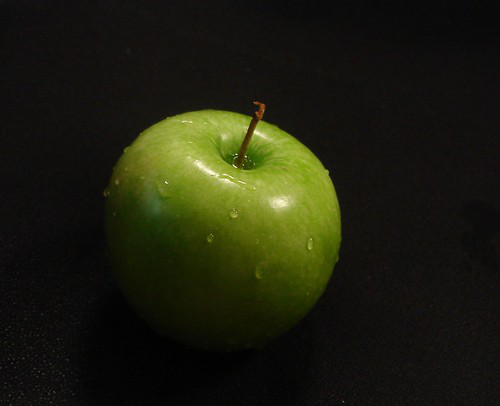

In [15]:
sample_dataset[0][0]

### リサイズ

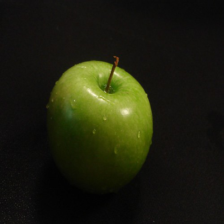

In [16]:
transforms.Resize([224, 224])(sample_dataset[0][0])

## ランダムに切り出し

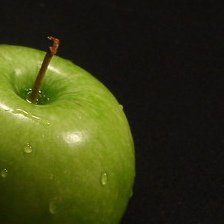

In [15]:
transforms.RandomCrop([224, 224])(sample_dataset[0][0])

### tensor型

In [18]:
transforms.ToTensor()(transforms.Resize([224, 224])(sample_dataset[0][0])).shape

torch.Size([3, 224, 224])

## Normalize

- 平均1,分散1と思った時 (n - 1)/1が出力になるので,-1される

In [8]:
transforms.Normalize(1, 1)(torch.arange(12).view(2, 3,2).float())

tensor([[[-1.,  0.],
         [ 1.,  2.],
         [ 3.,  4.]],

        [[ 5.,  6.],
         [ 7.,  8.],
         [ 9., 10.]]])

- 平均0,分散2だと思った時 (n - 0)/ 2なので半分になる

In [9]:
transforms.Normalize(0, 2)(torch.arange(12).view(2, 3,2).float())

tensor([[[0.0000, 0.5000],
         [1.0000, 1.5000],
         [2.0000, 2.5000]],

        [[3.0000, 3.5000],
         [4.0000, 4.5000],
         [5.0000, 5.5000]]])

## 正解ラベルの確認

In [32]:
print(train_dataset.class_to_idx)
print(test_dataset.class_to_idx)

{'apple': 0, 'banana': 1, 'orange': 2}
{'apple': 0, 'banana': 1, 'orange': 2}


## 基本的な実装は
- https://github.com/pytorch/vision/blob/master/torchvision/datasets/folder.py を参照
```python
class DatasetFolder(VisionDataset):
    """A generic data loader where the samples are arranged in this way: ::
        root/class_x/xxx.ext
        root/class_x/xxy.ext
        root/class_x/xxz.ext
        root/class_y/123.ext
        root/class_y/nsdf3.ext
        root/class_y/asd932_.ext
    Args:
        root (string): Root directory path.
        loader (callable): A function to load a sample given its path.
        extensions (tuple[string]): A list of allowed extensions.
            both extensions and is_valid_file should not be passed.
        transform (callable, optional): A function/transform that takes in
            a sample and returns a transformed version.
            E.g, ``transforms.RandomCrop`` for images.
        target_transform (callable, optional): A function/transform that takes
            in the target and transforms it.
        is_valid_file (callable, optional): A function that takes path of a file
            and check if the file is a valid file (used to check of corrupt files)
            both extensions and is_valid_file should not be passed.
     Attributes:
        classes (list): List of the class names sorted alphabetically.
        class_to_idx (dict): Dict with items (class_name, class_index).
        samples (list): List of (sample path, class_index) tuples
        targets (list): The class_index value for each image in the dataset
    """

    def __init__(
            self,
            root: str,
            loader: Callable[[str], Any],
            extensions: Optional[Tuple[str, ...]] = None,
            transform: Optional[Callable] = None,
            target_transform: Optional[Callable] = None,
            is_valid_file: Optional[Callable[[str], bool]] = None,
    ) -> None:
        super(DatasetFolder, self).__init__(root, transform=transform,
                                            target_transform=target_transform)
        
        # 正解ラベルをid(数値の変換)
        classes, class_to_idx = self._find_classes(self.root)
        
        # ディレクトリをまとめてデータの一覧を作成
        samples = make_dataset(self.root, class_to_idx, extensions, is_valid_file)
        if len(samples) == 0:
            msg = "Found 0 files in subfolders of: {}\n".format(self.root)
            if extensions is not None:
                msg += "Supported extensions are: {}".format(",".join(extensions))
            raise RuntimeError(msg)

        self.loader = loader
        self.extensions = extensions

        self.classes = classes
        self.class_to_idx = class_to_idx
        self.samples = samples
        self.targets = [s[1] for s in samples]

    def _find_classes(self, dir: str) -> Tuple[List[str], Dict[str, int]]:
        """
        Finds the class folders in a dataset.
        Args:
            dir (string): Root directory path.
        Returns:
            tuple: (classes, class_to_idx) where classes are relative to (dir), and class_to_idx is a dictionary.
        Ensures:
            No class is a subdirectory of another.
        """
        classes = [d.name for d in os.scandir(dir) if d.is_dir()]
        classes.sort()
        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        return classes, class_to_idx

    def __getitem__(self, index: int) -> Tuple[Any, Any]:
        """
        Args:
            index (int): Index
        Returns:
            tuple: (sample, target) where target is class_index of the target class.
        """
        path, target = self.samples[index]
        sample = self.loader(path)
        if self.transform is not None:
            sample = self.transform(sample)
        if self.target_transform is not None:
            target = self.target_transform(target)

        return sample, target

    def __len__(self) -> int:
        return len(self.samples)
```

## CNNの挙動

In [24]:
c1 = nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2)
r1 = nn.ReLU(inplace=True) # inplaceでなくてもよい、公式がinplaceになっていた。https://github.com/pytorch/vision/blob/master/torchvision/models/alexnet.py#L20
lrn1 = nn.LocalResponseNorm(5)
mp1 = nn.MaxPool2d(kernel_size=3, stride=2)
c2 = nn.Conv2d(64, 192, kernel_size=5, padding=2)
r2 = nn.ReLU(inplace=True)
lrn2 = nn.LocalResponseNorm(5)
c3 = nn.Conv2d(192, 384, kernel_size=3, padding=1)
r3 = nn.ReLU(inplace=True)
c4 = nn.Conv2d(384, 256, kernel_size=3, padding=1)
r4 = nn.ReLU(inplace=True)
c5 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
r5 = nn.ReLU(inplace=True)
mp3 = nn.MaxPool2d(kernel_size=3, stride=2)

In [17]:
x = train_dataset[0][0]

In [31]:
x.shape

torch.Size([3, 224, 224])

In [21]:
x = x.view(1, 3, 224, 224) # batch_sizeの次元を追加

## AlexNetの絵

<img width="1209" alt="image.png (263.1 kB)" src="https://img.esa.io/uploads/production/attachments/7890/2020/06/14/29770/78653653-682c-419e-8e45-1624533dee75.png">

- 2つの分岐の意味
  - 同じ絵の別チャンネルを表す.
  - チャンネル同士を行き来しているのはLocal Response Normalization

## c1の結果
- 3channnel, 224height, 224 width
  - stride 4
  - kernel_size 11
  - padding 2
なので縦、横は

In [27]:
# CNNの重み
c1.weight.shape

torch.Size([64, 3, 11, 11])

In [37]:
y = torch.arange(363).view(1, 3, 11, 11).float()

In [38]:
c1(y)

tensor([[[[-3.0497e+00, -8.8014e+01],
          [-2.8222e+01, -3.8042e+01]],

         [[ 1.3927e+02,  1.8285e+02],
          [ 9.3030e+01,  1.0243e+02]],

         [[-2.1770e+02, -1.0180e+02],
          [-2.2426e+02, -1.1560e+02]],

         [[-3.3973e+01, -4.5554e+01],
          [-2.9167e+01, -5.1460e+01]],

         [[-1.6887e+02, -5.1811e+01],
          [-1.7194e+02, -2.0546e+01]],

         [[ 9.5973e+01,  5.4709e+01],
          [ 1.6012e+02,  8.7072e+01]],

         [[-7.9353e+00,  3.7595e-01],
          [-1.8613e+01,  3.1916e+01]],

         [[ 2.5393e+01, -1.0291e+02],
          [ 1.1278e+02, -7.9298e+01]],

         [[-4.2188e+00,  7.5685e+01],
          [ 5.4551e+01,  5.9655e+01]],

         [[-9.8895e+00, -3.9931e+01],
          [ 4.0500e+01,  6.3517e+01]],

         [[ 7.9766e+01,  7.4278e+01],
          [ 1.5626e+02,  7.6657e+01]],

         [[-1.7490e+02, -4.1453e+01],
          [-2.1681e+02, -9.5421e+01]],

         [[-1.2044e+01,  1.8640e+01],
          [-1.6569e+01,  3

In [36]:
(224 + 2 * 2 - 11) //4 + 1

55

channelは3→64になる

In [45]:
x1 = c1(x)
x1.shape

torch.Size([1, 64, 55, 55])

In [46]:
x2 = r1(x1)

In [47]:
x2.shape

torch.Size([1, 64, 55, 55])

## Local Response Normalaizeation
- 他チャンネルの情報で結果をあわせる
- `torch.nn.LocalResponseNorm(size: int, alpha: float = 0.0001, beta: float = 0.75, k: float = 1.0)`
   - 今回はsize 5でalphaやbetaはいじらず

In [51]:
x3 = lrn1(x2)
x3.shape

torch.Size([1, 64, 55, 55])

## 簡単な例で詳しく見ると

In [79]:
lrs = nn.LocalResponseNorm(3, alpha=1.0, beta= -1.0, k=1.0)

- ノートでは式を以下とした
$$
\displaystyle b^i_{x,y}= \frac{a^i_{x,y}}{\left( k+\alpha \displaystyle \sum^{min(N-1,i+\frac{n}{2})}_{j=max(0,i-\frac{n}{2})} (a^j_{x,y})^2 \right)^\beta}
$$
- pytorchの場合
$$
\displaystyle b^i_{x,y}= \frac{a^i_{x,y}}{\left( k+\alpha / n\displaystyle \sum^{min(N-1,i+\frac{n}{2})}_{j=max(0,i-\frac{n}{2})} (a^j_{x,y})^2 \right)^\beta}
$$
となる

今`lrs`は
- n = 3 
- alpha= 1
- beta= -1.0 つまり分母がそのままかけられる
- k = 1.0
- lrsをしてもサイズは変わらない

In [81]:
lrs(torch.arange(6).view(1,6,1).float())
# 1個、6チャンネルのデータがある状態
# pytorchのlrnは alpha / n (nはLocalResponseNormの最初の引数)倍される.
# 0は  0 * (1 + 1/3(0+ 1))
# 1は  1 * (1 + 1/3 (0 + 1 + 4))
# 2は  2 * (1 + 1/3 ( 1 + 4 + 9)
# 3は  3 * (1 + 1/3 (4 + 9 + 16))
# 4は  4 * (1 + 1/3 (9 + 16 + 25))
# 5は  5 * (1 + 1/3 (16 + 25))

tensor([[[ 0.0000],
         [ 2.6667],
         [11.3333],
         [32.0000],
         [70.6667],
         [73.3333]]])

In [82]:
lrs(torch.arange(6).view(1,6,1).float()).shape

torch.Size([1, 6, 1])

## Maxppling
- `mp1 = nn.MaxPool2d(kernel_size=3, stride=2)`
- kenrel_size = 3なので、3×3で最大のものを取得する
- stride=2なのでサイズは
  (55 - 3) // 2 + 1= 27

In [95]:
x4 = mp1(x3)
x4.shape

torch.Size([1, 64, 27, 27])

## 後は同じことの繰り返しなので、

In [19]:
cnn_list = [nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(5),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(5),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)]

In [22]:
_x = x
print("shape", _x.shape)
for cnn in cnn_list:
    print(cnn)
    _x = cnn(_x)
    print("shape", _x.shape)

shape torch.Size([1, 3, 224, 224])
Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
shape torch.Size([1, 64, 55, 55])
ReLU(inplace=True)
shape torch.Size([1, 64, 55, 55])
LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=1.0)
shape torch.Size([1, 64, 55, 55])
MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
shape torch.Size([1, 64, 27, 27])
Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
shape torch.Size([1, 192, 27, 27])
ReLU(inplace=True)
shape torch.Size([1, 192, 27, 27])
LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=1.0)
shape torch.Size([1, 192, 27, 27])
MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
shape torch.Size([1, 192, 13, 13])
Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
shape torch.Size([1, 384, 13, 13])
ReLU(inplace=True)
shape torch.Size([1, 384, 13, 13])
Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
shape torch.Size([1, 256, 13, 13])
R

### なので

In [5]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        # CNNによる特徴量作成
        self.features = self.make_feature()
        # 全結合による分類
        self.classifier = self.make_classifier(num_classes)

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x
    
    def make_feature(self):
        return nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(5),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(5),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
    
    def make_classifier(self, num_classes):
        return nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

In [6]:
class Hparams():
    batch_size = 16
    input_size = 784
    output_size = 10
    learning_rate = 0.01
    epoch_num = 5

hparams = Hparams()

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AlexNet(3).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=hparams.learning_rate)

In [11]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=hparams.batch_size,
                                         shuffle=False)

In [12]:
for epoch in range(hparams.epoch_num):
    model.train()
    for idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, epoch , hparams.epoch_num,
          100. * epoch / hparams.epoch_num, loss.item()))

    model.eval()
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss += criterion(output, target).item() 
            pred = output.argmax(dim=1, keepdim=True) # 予測の最大値を取得
            correct += pred.eq(target.view_as(pred)).sum().item()
        loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

Train Epoch: 0 [0/5 (0%)]	Loss: 0.891860

Test set: Average loss: 0.0737, Accuracy: 119/302 (39%)

Train Epoch: 1 [1/5 (20%)]	Loss: 0.774085

Test set: Average loss: 0.0614, Accuracy: 157/302 (52%)

Train Epoch: 2 [2/5 (40%)]	Loss: 1.305069

Test set: Average loss: 0.0596, Accuracy: 146/302 (48%)

Train Epoch: 3 [3/5 (60%)]	Loss: 0.433198

Test set: Average loss: 0.0512, Accuracy: 177/302 (59%)

Train Epoch: 4 [4/5 (80%)]	Loss: 1.083539

Test set: Average loss: 0.0550, Accuracy: 211/302 (70%)

